# Regularization

In [1]:
import base64
import collections
import datetime
import itertools
import json
import math
import os
import operator
import pickle
import random
import re
import sys
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
mpl.rcParams['figure.figsize'] = 20, 12
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

linewidth = 1.0
dotsize = 15

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/

### Define the True Function and Generate the Sample Data

In [2]:
# the true parameters and the function to be estimated

a = 1.5
b = -1.0
c = 0.5

def f(x):
    return a*np.square(x) + b*x + c

In [3]:
f_points = pd.DataFrame({'x': np.linspace(-1, 1, 100)})
f_points['y'] = f_points.x.apply(f)

In [4]:
sample_size = 100

sample = pd.DataFrame({'x': np.random.uniform(-1, 1, sample_size)})
sample['y'] = sample.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

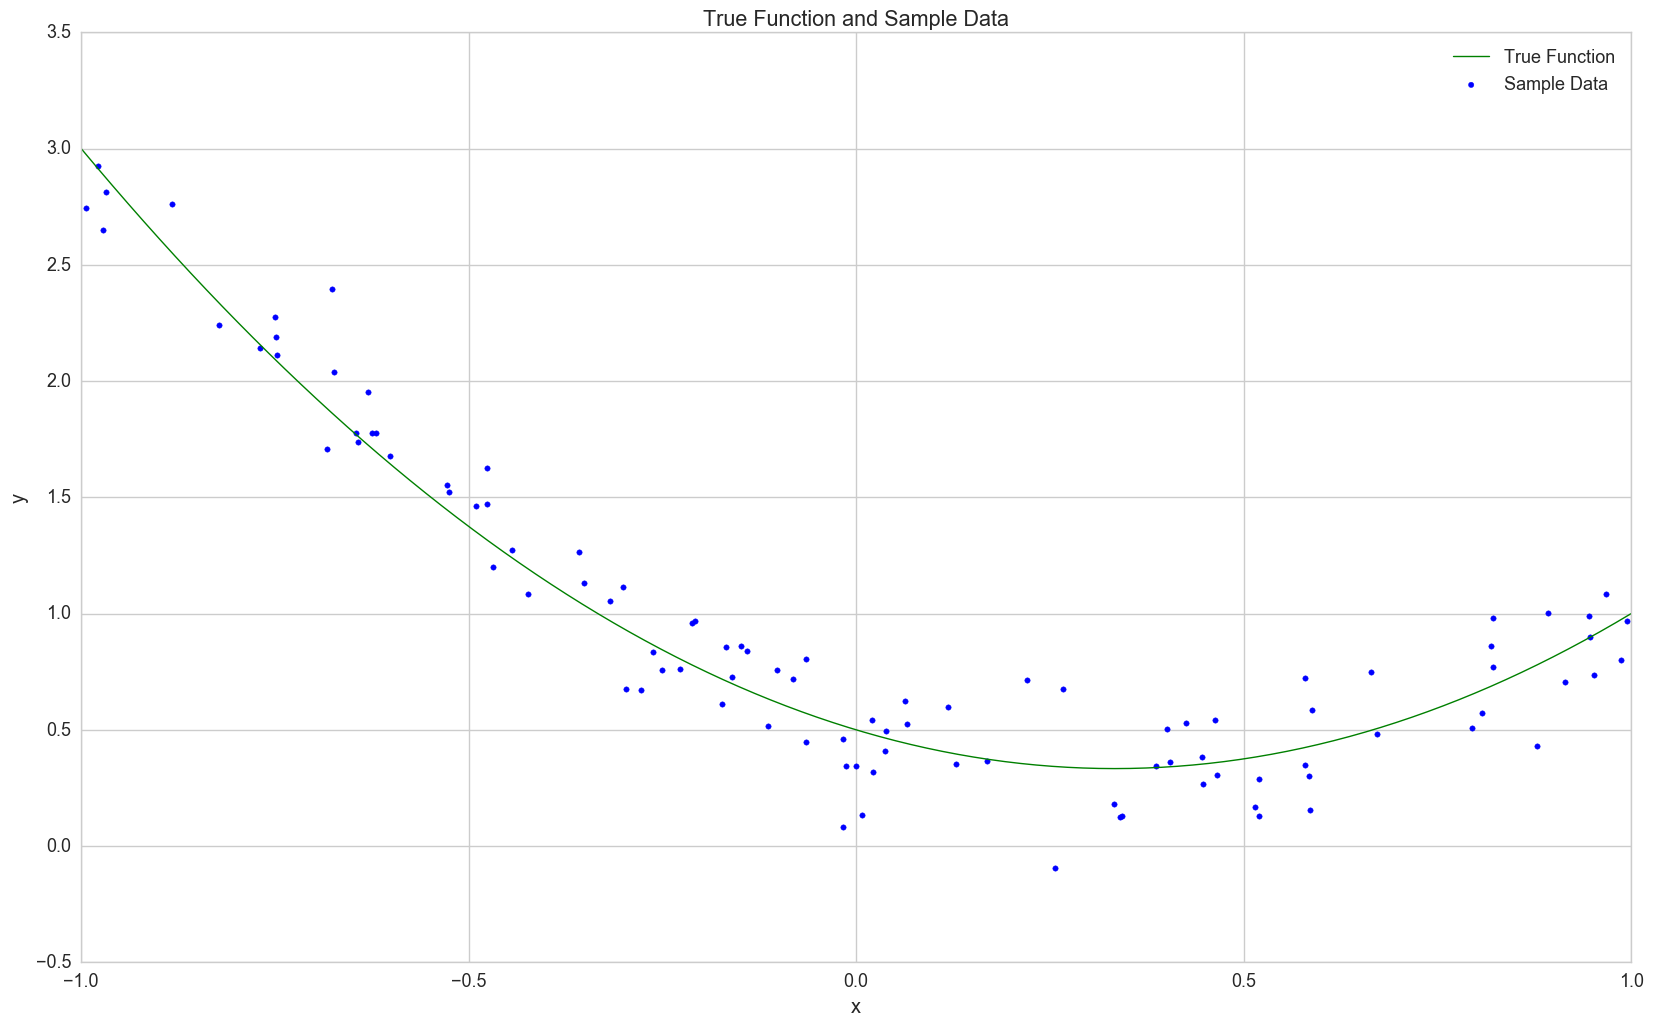

In [5]:
n_plot_points = 100
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x[:n_plot_points], sample.y[:n_plot_points], color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.xlim((-1, 1))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True Function and Sample Data')
_ = plt.legend()

### Second Degree Polynom Fitting with L2 Regularization

alpha:         0
coefficients:  [ 0.         -1.035374    1.48951117]
intercept:     0.515932784247
alpha:         1
coefficients:  [ 0.         -0.99206279  1.33644322]
intercept:     0.562635529069
alpha:         10
coefficients:  [ 0.         -0.73785576  0.68578498]
intercept:     0.760010554281
alpha:         100
coefficients:  [ 0.         -0.22073619  0.11072268]
intercept:     0.92966415702


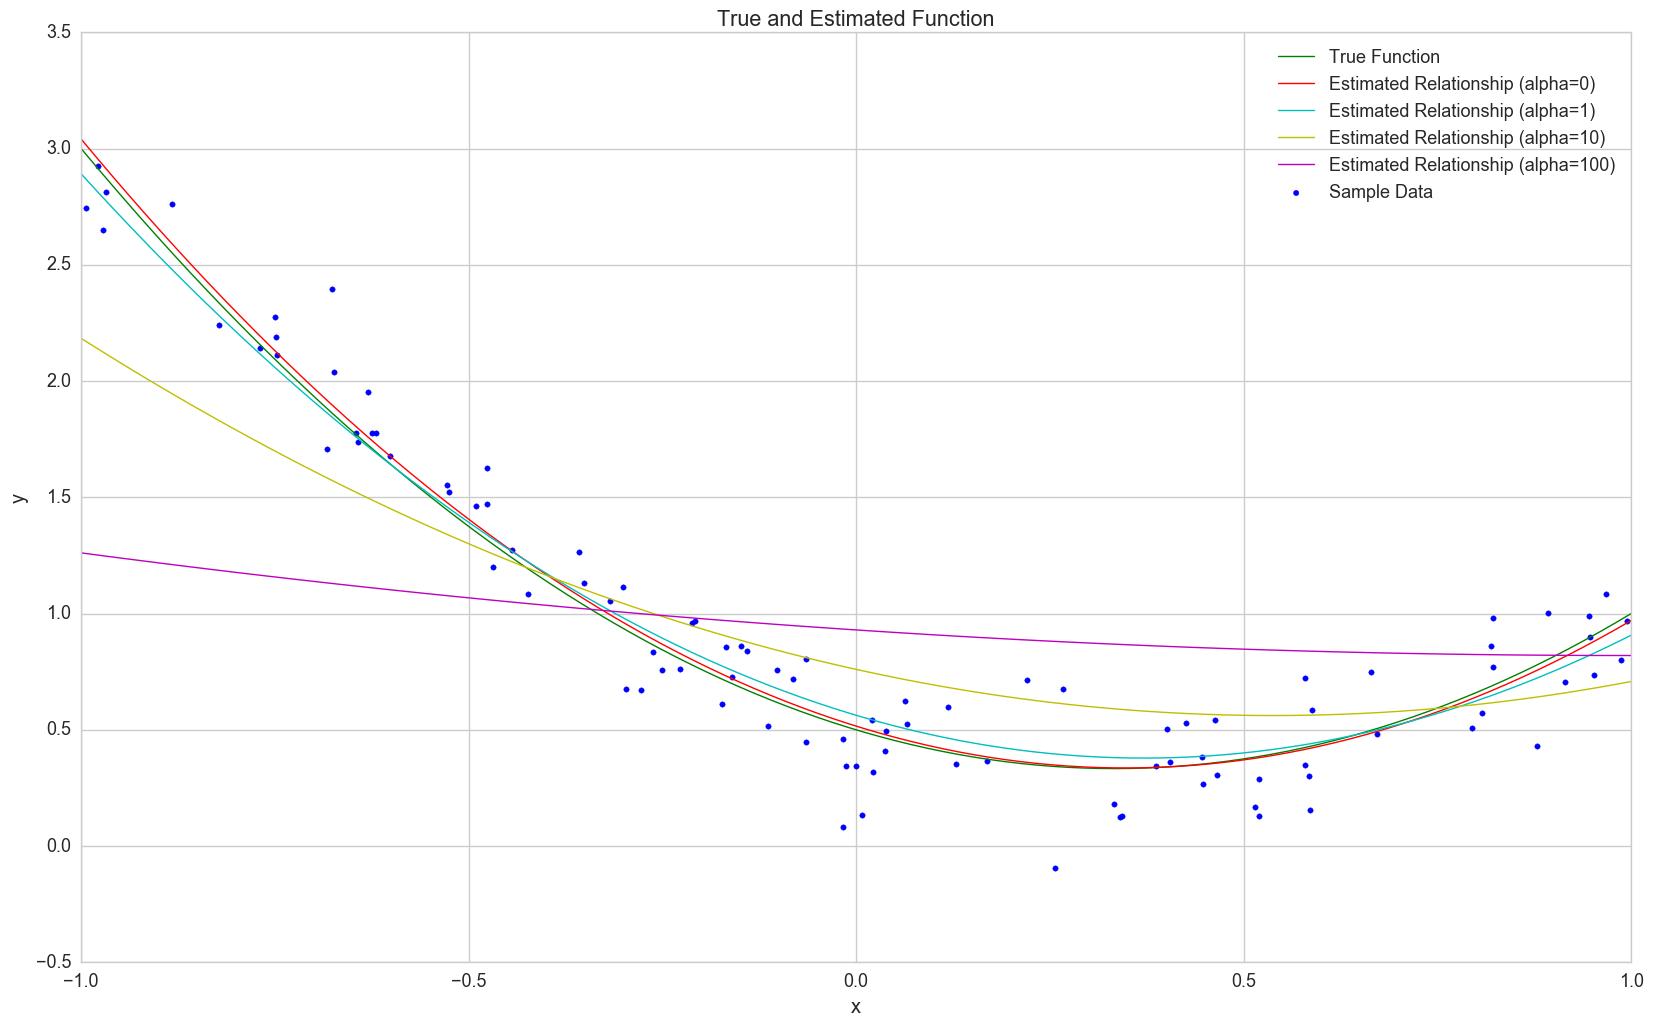

In [6]:
alphas = [0, 1, 10, 100]
colors = ['r', 'c', 'y', 'm']

models = {}
for a in alphas:
    models[a] = sklearn.pipeline.make_pipeline(
        sklearn.preprocessing.PolynomialFeatures(2),
        sklearn.linear_model.Ridge(a))
    models[a].fit(sample[['x']], sample.y)
    print 'alpha:        ', a
    print 'coefficients: ', models[a].steps[1][1].coef_
    print 'intercept:    ', models[a].steps[1][1].intercept_
    print '=' * 20

preds = {}
for a in alphas:
    preds[a] = pd.DataFrame({'x': np.linspace(-1, 1, 100)})
    preds[a]['y'] = models[a].predict(preds[a])

_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
i = 0
for a in alphas:
    _ = plt.plot(
        preds[a].x,
        preds[a].y,
        colors[i] + '-',
        linewidth=linewidth,
        label='Estimated Relationship (alpha=' + str(a) + ')')
    i += 1
_ = plt.xlim((-1, 1))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend()

### Second Degree Polynom Fitting with L1 Regularization

/usr/local/lib/python2.7/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha:         0
coefficients:  [ 0.         -1.035374    1.48951117]
intercept:     0.515932784247
alpha:         0.1
coefficients:  [ 0.         -0.62651819  0.32359478]
intercept:     0.870373825303
alpha:         0.5
coefficients:  [ 0. -0.  0.]
intercept:     0.960344821897
alpha:         1.0
coefficients:  [ 0. -0.  0.]
intercept:     0.960344821897


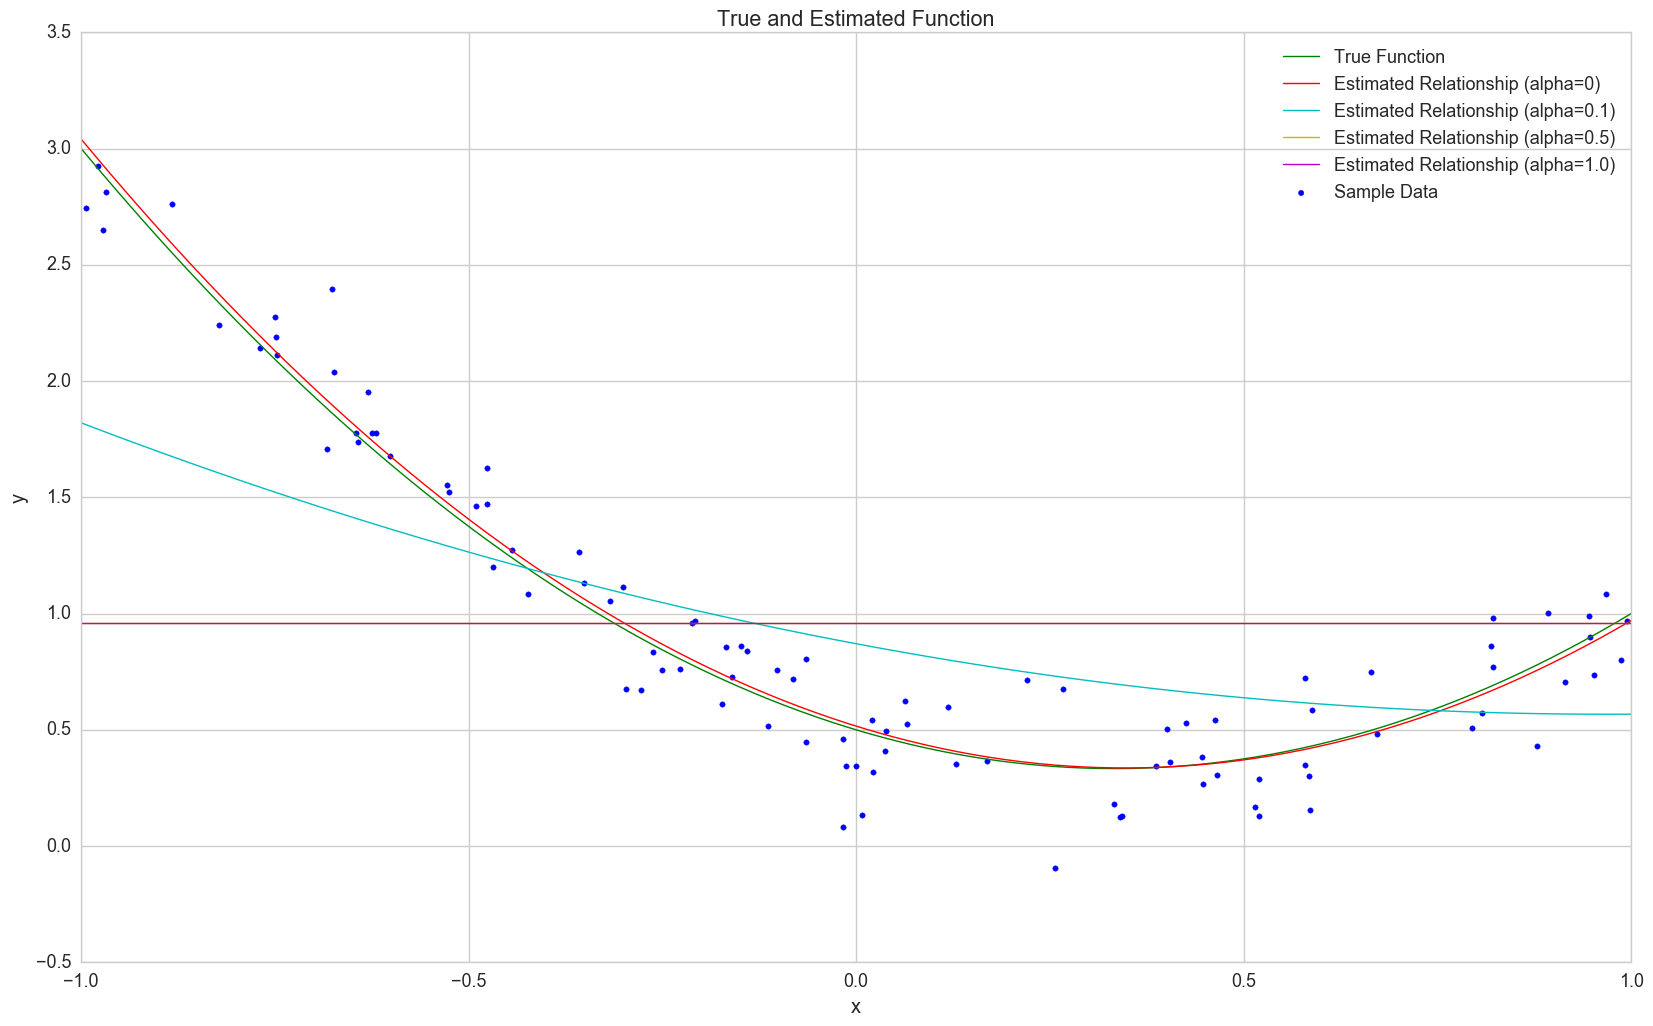

In [7]:
alphas = [0, 0.1, 0.5, 1.0]
colors = ['r', 'c', 'y', 'm']

models = {}
for a in alphas:
    models[a] = sklearn.pipeline.make_pipeline(
        sklearn.preprocessing.PolynomialFeatures(2),
        sklearn.linear_model.Lasso(a))
    models[a].fit(sample[['x']], sample.y)
    print 'alpha:        ', a
    print 'coefficients: ', models[a].steps[1][1].coef_
    print 'intercept:    ', models[a].steps[1][1].intercept_
    print '=' * 20

preds = {}
for a in alphas:
    preds[a] = pd.DataFrame({'x': np.linspace(-1, 1, 100)})
    preds[a]['y'] = models[a].predict(preds[a])

_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
i = 0
for a in alphas:
    _ = plt.plot(
        preds[a].x,
        preds[a].y,
        colors[i] + '-',
        linewidth=linewidth,
        label='Estimated Relationship (alpha=' + str(a) + ')')
    i += 1
_ = plt.xlim((-1, 1))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend()